In [1]:
#question 2
#import dataset
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns = boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target
boston.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split


X = boston[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
y = boston[['MEDV']]
#normalization
X = (X - np.min(X)) / (np.max(X) - np.min(X))
y = (y - np.min(y)) / (np.max(y) - np.min(y))

#try 9 values of alpha 
R2 = [] #10*10 R^2 value of each fold of each alpha

n = 0
for a in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]:
    R2.append([])
#10-fold cross validation on 80-20 train-test splits
    for i in range(10):
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        ridge = linear_model.Ridge(alpha = a)
        ridge.fit(x_train, y_train)
        score = ridge.score(x_test, y_test)
        R2[n].append(score)
    n += 1
#print(R2)        

#calculate the mean of R^2 of each alpha values test
mean_of_R2 = np.mean(R2, axis = 1)
print("When alpha = 0.1, 0.2, ... , 0.9, 1, the mean of 10-fold cross validation on 80-20 train-test splits R^2 values are:")
print(mean_of_R2)


When alpha = 0.1, 0.2, ... , 0.9, 1, the mean of 10-fold cross validation on 80-20 train-test splits R^2 values are:
[0.71075085 0.72912797 0.71639887 0.67436261 0.70070417 0.71309898
 0.71021473 0.74199932 0.74104063 0.72302204]


(200, 2)


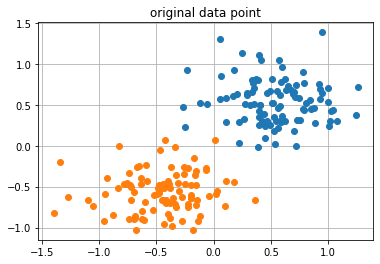

In [4]:
#question 4
import matplotlib.pyplot as plt
import math
import time

# a
#generate two clusters of data pointsx and plot
x1 = list(np.random.normal(0.5, 0.3, [2,100]))
x2 = list(np.random.normal(-0.5, 0.3, [2,100]))
x = np.hstack((x1, x2)).T
print(x.shape)

y1 = [[1] * 100]
y2 = [[0] * 100]
y = np.hstack((y1, y2)).T
#print(y.shape)

plt.title('original data point')
plt.plot(x1[0], x1[1], 'o')
plt.plot(x2[0], x2[1], 'o')
plt.grid(True)


GD Logistic Regression
coef      =  [-0.69145538  8.41198747 14.5479045 ]
iteration =  4999
Total CPU time of GD is:  25.449107400000003


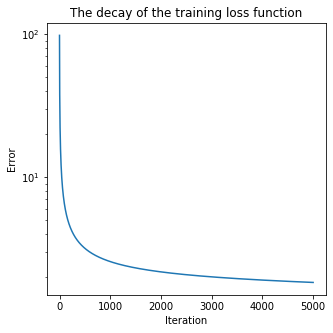

In [5]:
# b
def sigmoid(z):
    return 1/(1 + math.exp(-z))

def L(x, y, w):
    n, d = x.shape
    sumL = 0
    for i in range(n):
        l = -(y[i] * math.log(sigmoid(w.dot(x[i]))) + (1 - y[i]) * math.log(1 - sigmoid(w.dot(x[i]))))
        sumL += l
    return sumL
    
def gradL(x, y, w):
    n, d = x.shape
    gradL_vector = []
    for i in range(d):
        sum_dev = 0
        for j in range(n):
            #print(i,j)
            dev = (sigmoid(w.dot(x[j])) - y[j]) * x[j][i]
            sum_dev += dev
        gradL_vector.append(float(sum_dev))
        
    #print(gradL_vector)
    return np.array(gradL_vector)

def gradient_descent(X, y, w0, eta, tau):
    loss = np.zeros(tau)
    
    for i in range(tau):
        w1 = w0 - eta * gradL(X, y, w0)
        w0 = w1
        #print(w0)
        loss[i] = L(X, y, w0)
        #if np.abs(loss[i] - loss[i-1]) < 0.001:
        #    break
        
    return w0, loss, i


n,d = x.shape
onelist = np.array(np.ones(n))
x = np.hstack((x1, x2)).T
x = np.c_[onelist.T, x]
w0 = np.random.normal(0,1, x.shape[1])

#calculate the CPU time of GD
start_GD = time.perf_counter()
coefs, loss, t= gradient_descent(x, y, w0, 0.01, 5000)
end_GD = time.perf_counter()
time_GD = end_GD - start_GD

print("GD Logistic Regression")
print("coef      = ", coefs)
print("iteration = ", t)
print("Total CPU time of GD is: ", time_GD)


def error_plot(y, yscale='log'):
    plt.figure(figsize=(5,5))
    plt.title('The decay of the training loss function')
    plt.xlabel('Iteration')
    plt.ylabel('Error')
    plt.yscale(yscale)
    plt.plot(range(t),y[:t])

error_plot(loss)


SGD Logistic Regression
coef      =  [-0.12557303  3.36246873  2.81465892]
iteration =  4999
Total CPU time of GD is:  7.726625400000017

Demonstrate that SGD is faster per-iteration than GD
CPU time per-iteration of GD:  0.0050908396479295865
CPU time per-iteration of SGD:  0.0015456342068413717


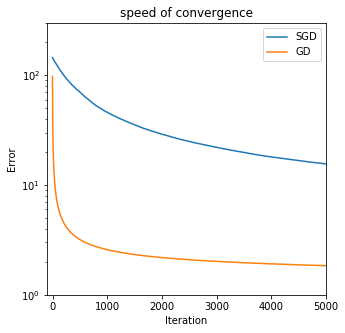

In [8]:
# c

def L_SGD(x, y, w):
    return -(y * math.log(sigmoid(w.dot(x))) + (1 - y) * math.log(1 - sigmoid(w.dot(x))))



def gradL_SGD(x, y, w):
    d = len(x)
    #print(d)
    gradL_vector = []
    for i in range(d):
        sum_dev = 0
        dev = (sigmoid(w.dot(x)) - y) * x[i]
        
        sum_dev += dev
        gradL_vector.append(float(sum_dev))
        
    #print(gradL_vector)
    return np.array(gradL_vector)


def SGD(x, y, w0, eta, tau):
    loss = np.zeros(tau)
    
    
    for i in range(tau):
        index = np.random.randint(0, len(x))
        w1 = w0 - eta * gradL_SGD(x[index], y[index], w0)
        w0 = w1
        #print(w0)
        loss[i] = L(x, y, w0)
        #if np.abs(loss[i] - loss[i-1]) < 0.001/200:
        #    break
        
    return w0, loss, i

w0 = np.random.normal(0,1, x.shape[1])
start_SGD = time.perf_counter()
coefs2, loss2, t2= SGD(x, y, w0, 0.01, 5000)
end_SGD = time.perf_counter()
time_SGD = end_SGD - start_SGD
print("SGD Logistic Regression")
print("coef      = ", coefs2)
print("iteration = ", t2)
print("Total CPU time of GD is: ", time_SGD)


plt.figure(figsize=(5,5))
plt.title('speed of convergence')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.yscale('log')
plt.axis([-100, 5000, 1, 300])
plt.plot(range(t2),loss2[:t2] )
plt.plot(range(t),loss[:t])
plt.legend(['SGD', 'GD'])

print("")
print("Demonstrate that SGD is faster per-iteration than GD")
print("CPU time per-iteration of GD: ", time_GD/t)
print("CPU time per-iteration of SGD: ",time_SGD/t2)

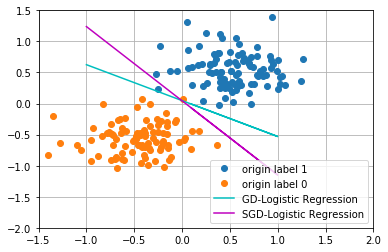

In [9]:

# d
#
plt.figure(1)
plt.axis([-1.5, 2, -2, 1.5])
plt.plot(x1[0], x1[1], 'o')
plt.plot(x2[0], x2[1], 'o')

x1model = np.array([-1,1,0.1])
x2model = (-coefs[0] - coefs[1]* x1model) / coefs[2]
plt.plot(x1model, x2model, 'c')

x1model2 = np.array([-1,1,0.1])
x2model2 = (-coefs2[0] - coefs2[1]* x1model) / coefs2[2]
plt.plot(x1model2, x2model2, 'm')

plt.legend(['origin label 1', 'origin label 0', 'GD-Logistic Regression', 'SGD-Logistic Regression'])
plt.grid(True)




In [ ]:
# question5 
# I spent 1 + 1 + 1 + 4 = 7 hours on this assignment.